In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Required Libraries:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the dataset:
df = pd.read_csv("/content/drive/MyDrive/COMP-5011-Assignment1-LinearRegression/Housing.csv")

# Extract features that should be Consider according to Assignment Tasks:
required_features = ["area", "bedrooms", "hotwaterheating", "airconditioning", "bathrooms","price"]
df = df[required_features]
df.head(4)

,area,bedrooms,hotwaterheating,airconditioning,bathrooms,price
0,7420,4,no,yes,2,13300000
1,8960,4,no,yes,4,12250000
2,9960,3,no,no,2,12250000
3,7500,4,no,yes,2,12215000


In [ ]:
# Size of Data set
df.shape

(545, 6)

In [ ]:
# Summarize the structure of loaded dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   area             545 non-null    int64 
 1   bedrooms         545 non-null    int64 
 2   hotwaterheating  545 non-null    object
 3   airconditioning  545 non-null    object
 4   bathrooms        545 non-null    int64 
 5   price            545 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 25.7+ KB


In [ ]:
# quantitative summary of the numerical columns in dataset
df.describe()

,area,bedrooms,bathrooms,price
count,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,4.766729e+06
std,2170.141023,0.738064,0.502470,1.870440e+06
min,1650.000000,1.000000,1.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,1.330000e+07


In [ ]:
#Check for missing values
print("Missing values in each column:", df.isnull().sum())

Missing values in each column: area               0
bedrooms           0
hotwaterheating    0
airconditioning    0
bathrooms          0
price              0
dtype: int64


In [ ]:
# Convert categorical features (hotwaterheating and airconditioning) to binary. (0= No, 1= Yes)
df["hotwaterheating"] = [0 if i=="no" else 1 for i in df["hotwaterheating"]]
df["airconditioning"] = [0 if i=="no" else 1 for i in df["airconditioning"]]
df.head()

,area,bedrooms,hotwaterheating,airconditioning,bathrooms,price
0,7420,4,0,1,2,13300000
1,8960,4,0,1,4,12250000
2,9960,3,0,0,2,12250000
3,7500,4,0,1,2,12215000
4,7420,4,0,1,1,11410000


In [ ]:
# Select features to scale (excluding the target variable 'price')
features_to_scale = df[['area', 'bedrooms', 'hotwaterheating', 'airconditioning', 'bathrooms']]

# Fit and transform the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Convert scaled features back to a DataFrame and Add the target variable back (price) to the scaled DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['area', 'bedrooms', 'hotwaterheating', 'airconditioning', 'bathrooms'])
scaled_df['price'] = df['price'].values

scaled_df.head()

,area,bedrooms,hotwaterheating,airconditioning,bathrooms,price
0,1.046726,1.403419,-0.219265,1.472618,1.421812,13300000
1,1.757010,1.403419,-0.219265,1.472618,5.405809,12250000
2,2.218232,0.047278,-0.219265,-0.679063,1.421812,12250000
3,1.083624,1.403419,-0.219265,1.472618,1.421812,12215000
4,1.046726,1.403419,-0.219265,1.472618,-0.570187,11410000


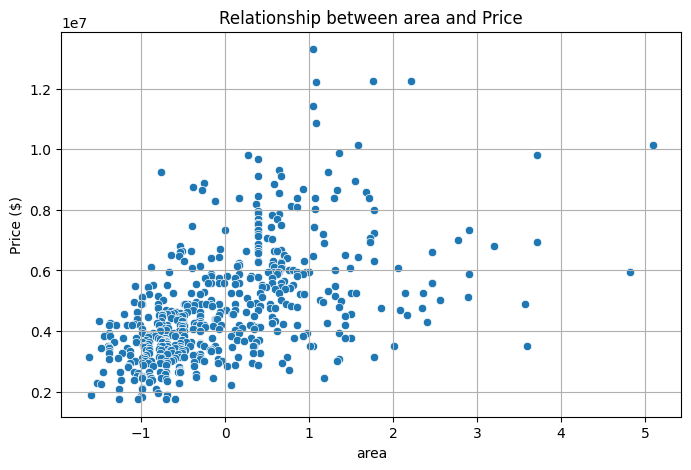

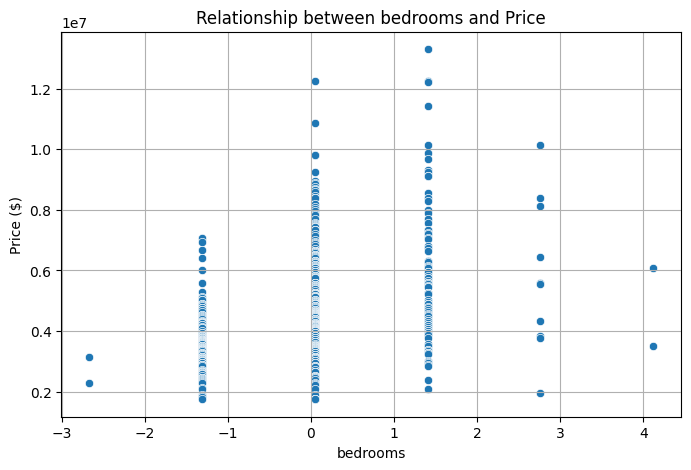

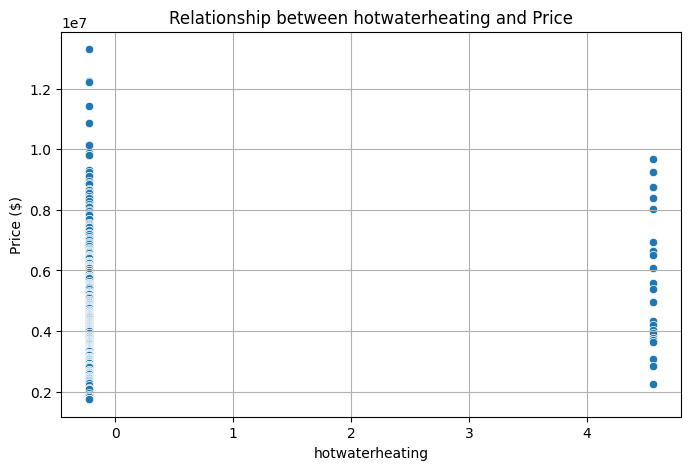

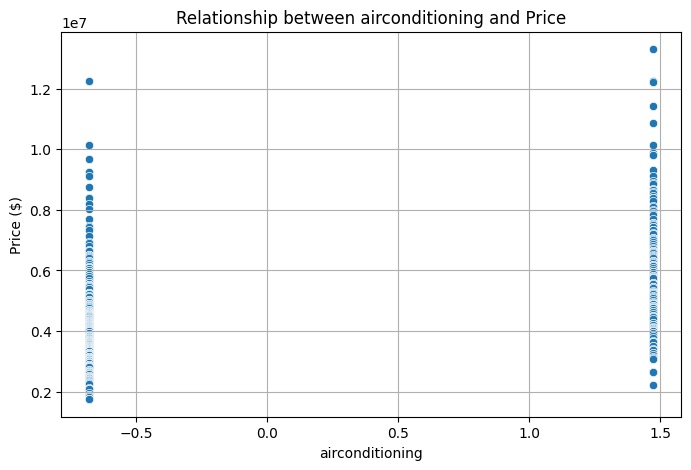

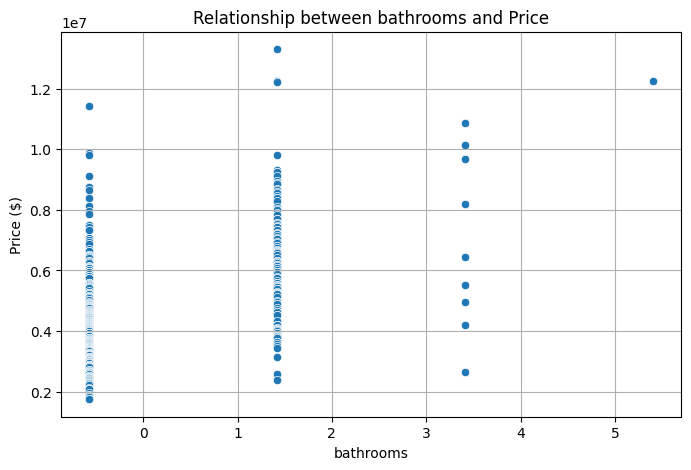

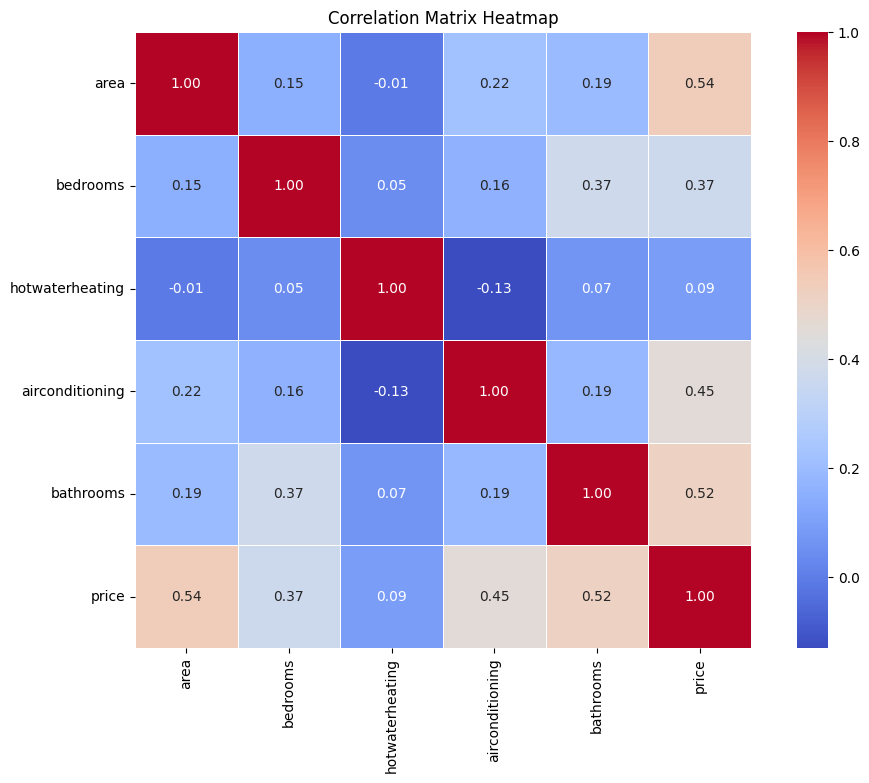

In [ ]:
# Extract features and the target variable
features = scaled_df.drop('price', axis=1)
target = scaled_df['price']

# Loop through each feature and create a scatter plot
for feature in features.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=features[feature], y=target)
    plt.title(f'Relationship between {feature} and Price')
    plt.xlabel(feature)
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.show()


# Compute the correlation matrix
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
X = scaled_df.drop('price', axis=1)  # Features (independent variables)
y = scaled_df['price']               # Target variable (dependent variable (price))

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Shapes of the Train and Test datasets
print(f'Train set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Train set size: (436, 5)
Test set size: (109, 5)


In [ ]:
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add intercept
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]    # Add intercept for test set

#Calculate parameters using Normal Equation
theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train)

#Extract intercept (b) and slopes (m)
b = theta_best[0]  # Intercept
m = theta_best[1:]  # Slopes for each feature

#Function to predict values
def predict(X, b, m):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept
    return X_b.dot(np.r_[b, m])  # Concatenate b with m for predictions

#Make predictions on the test dataset
predictions = predict(X_test, b, m)

#Showing predicted value (price), Actual value (price) and difference of them
for i in range(len(predictions)):
    print(f"Predicted Price: {int(predictions[i])}    |   Actual Price: {y_test.values[i]}    |    difference:{int(predictions[i])-y_test.values[i]}")

Predicted Price: 5741068    |   Actual Price: 4060000    |    difference:1681068
Predicted Price: 6819096    |   Actual Price: 6650000    |    difference:169096
Predicted Price: 3378466    |   Actual Price: 3710000    |    difference:-331534
Predicted Price: 5100092    |   Actual Price: 6440000    |    difference:-1339908
Predicted Price: 3620897    |   Actual Price: 2800000    |    difference:820897
Predicted Price: 4463414    |   Actual Price: 4900000    |    difference:-436586
Predicted Price: 6174606    |   Actual Price: 5250000    |    difference:924606
Predicted Price: 5463282    |   Actual Price: 4543000    |    difference:920282
Predicted Price: 3134258    |   Actual Price: 2450000    |    difference:684258
Predicted Price: 3236270    |   Actual Price: 3353000    |    difference:-116730
Predicted Price: 8982004    |   Actual Price: 10150000    |    difference:-1167996
Predicted Price: 3346108    |   Actual Price: 2660000    |    difference:686108
Predicted Price: 4442508    |  

In [ ]:
# Evaluate the model using MSE, MAE, and R² Score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print("MSE:", mse.__round__(2))
print("MAE:", mae.__round__(2))
print("R² Score:", r2.__round__(2))


MSE: 2346728742911.69
MAE: 1156665.64
R² Score: 0.54


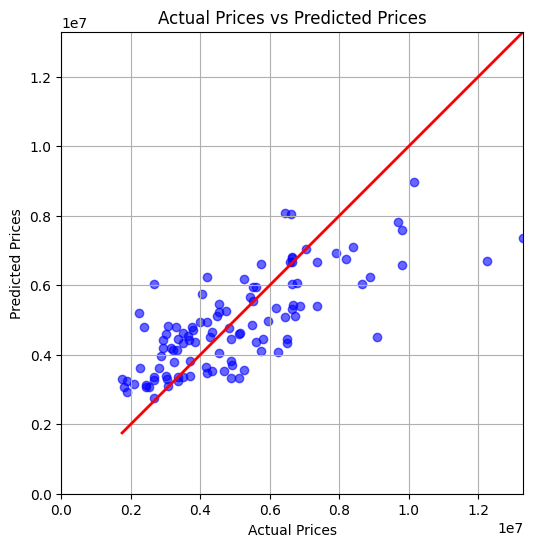

In [ ]:
#Compare the predicted values with actual values using a scatter plot (predicted vs.actual)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Diagonal line
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.xlim([0, max(y_test.max(), predictions.max())])  # Set x and y limits
plt.ylim([0, max(y_test.max(), predictions.max())])
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio
plt.show()